___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Відкрийте файл та виведіть описову статистику

In [2]:
loan_base = pd.read_csv('loan_data.csv')
loan_base

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [49]:
loan_base.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

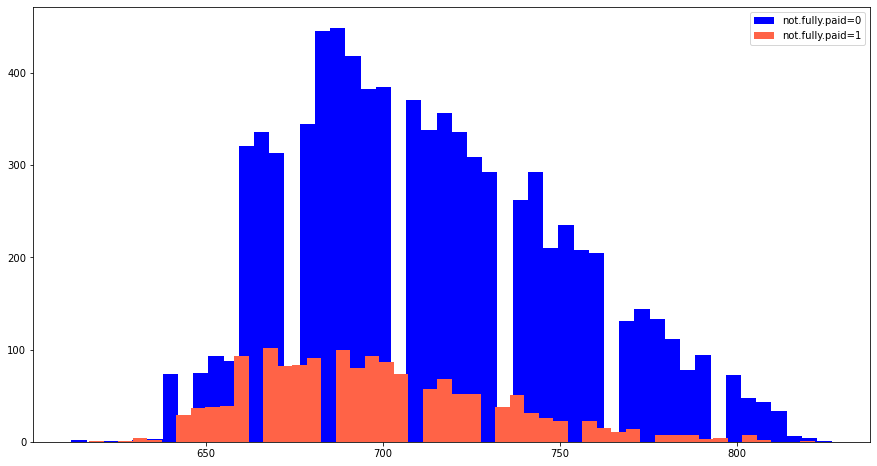

In [65]:
base1=loan_base[['fico','not.fully.paid']]
base2 = base1[base1['not.fully.paid'] == 1]
base3 = base1[base1['not.fully.paid'] == 0]

fig, ax = plt.subplots(figsize=(15,8))
plt.hist(base3['fico'], color='blue', bins=50,label='not.fully.paid=0')
plt.hist(base2['fico'], color='tomato', bins=50, label='not.fully.paid=1')

ax.legend(loc=1)
plt.show()

Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

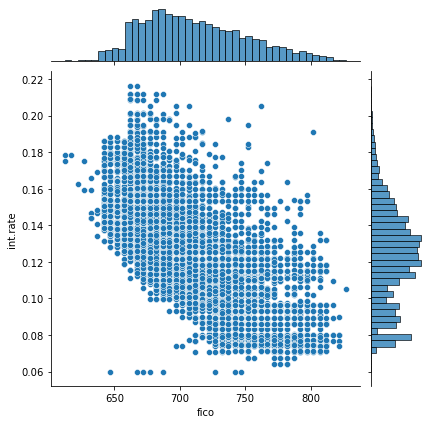

In [18]:
sns.jointplot(data=loan_base[['fico','int.rate']], x="fico", y="int.rate")

Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

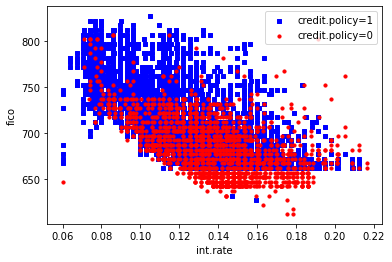

In [3]:
# Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції
base1=loan_base[['int.rate','fico','credit.policy']]
base2 = base1[base1['credit.policy'] == 1]
base3 = base1[base1['credit.policy'] == 0]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(base2['int.rate'], base2['fico'], s=10, c='b', marker="s", label='credit.policy=1')
ax.scatter(base3['int.rate'], base3['fico'], s=10, c='r', marker="o", label='credit.policy=0')
plt.legend(loc='upper right');
ax.set_xlabel('int.rate')
ax.set_ylabel('fico')
plt.show()

purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [4]:
loan_base1=pd.get_dummies(loan_base["purpose"])
del loan_base["purpose"]

loan_base = pd.concat([loan_base, loan_base1],axis=1, join="inner")
loan_base.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


Розбийте датасет на тестві та трейнові дані

In [5]:
from sklearn.model_selection import train_test_split

y = loan_base["credit.policy"]
X = loan_base.drop('credit.policy',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

# Логістична регресія

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [8]:
logmodel.score(X_train,y_train)

0.9004207573632539

In [9]:
logmodel.score(X_test,y_test)

0.8952863018032269

In [10]:
y_predictions = logmodel.predict(X_test)

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_predictions)

0.8952863018032269

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       606
           1       0.91      0.97      0.94      2555

    accuracy                           0.90      3161
   macro avg       0.87      0.77      0.81      3161
weighted avg       0.89      0.90      0.89      3161



In [14]:
m1=confusion_matrix(y_test,y_predictions)
print(m1)

[[ 347  259]
 [  72 2483]]


# Дерево рішень

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [16]:
for i in range(1,20):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    print(f'qty_depth = {i} Score = {dtree.score(X_train,y_train)}')

qty_depth = 1 Score = 0.9010441016051114
qty_depth = 2 Score = 0.9504441327723235
qty_depth = 3 Score = 0.9694561321489793
qty_depth = 4 Score = 0.9791179678977715
qty_depth = 5 Score = 0.9870656069814555
qty_depth = 6 Score = 0.9906498363721365
qty_depth = 7 Score = 0.9915848527349228
qty_depth = 8 Score = 0.9932990494000312
qty_depth = 9 Score = 0.9937665575814243
qty_depth = 10 Score = 0.9962599345488546
qty_depth = 11 Score = 0.997974131213963
qty_depth = 12 Score = 0.9984416393953561
qty_depth = 13 Score = 0.9992208196976781
qty_depth = 14 Score = 0.9995324918186068
qty_depth = 15 Score = 0.9996883278790712
qty_depth = 16 Score = 0.9998441639395356
qty_depth = 17 Score = 1.0
qty_depth = 18 Score = 1.0
qty_depth = 19 Score = 1.0


In [17]:
dtree = DecisionTreeClassifier(max_depth=17)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=17)

In [18]:
predictions = dtree.predict(X_test)

In [19]:
dtree.score(X_train,y_train)

1.0

In [20]:
dtree.score(X_test,y_test)

0.9905093324897184

In [22]:
pip install dtreeviz

In [13]:
from dtreeviz.trees import *
viz = dtreeviz(dtree,
               X,
               y,
               target_name='credit.policy',
               )
              
viz.view()              

[Text(479.91875, 633.1341176470589, 'X[8] <= 3.5\ngini = 0.317\nsamples = 6417\nvalue = [1266, 5151]'),
 Text(352.2375, 594.7623529411765, 'X[4] <= 659.5\ngini = 0.178\nsamples = 5589\nvalue = [552, 5037]'),
 Text(339.83750000000003, 556.3905882352942, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]'),
 Text(364.6375, 556.3905882352942, 'X[5] <= 1109.5\ngini = 0.111\nsamples = 5354\nvalue = [317, 5037]'),
 Text(352.2375, 518.0188235294117, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(377.0375, 518.0188235294117, 'X[6] <= 105421.0\ngini = 0.076\nsamples = 5244\nvalue = [207, 5037]'),
 Text(270.475, 479.64705882352945, 'X[3] <= 24.995\ngini = 0.045\nsamples = 5133\nvalue = [119, 5014]'),
 Text(193.75, 441.2752941176471, 'X[7] <= 99.95\ngini = 0.024\nsamples = 5072\nvalue = [62, 5010]'),
 Text(181.35, 402.90352941176474, 'X[6] <= 48789.5\ngini = 0.02\nsamples = 5062\nvalue = [52, 5010]'),
 Text(89.9, 364.5317647058824, 'X[6] <= 7.5\ngini = 0.009\nsamples = 4832\nvalue = [22, 4810]')

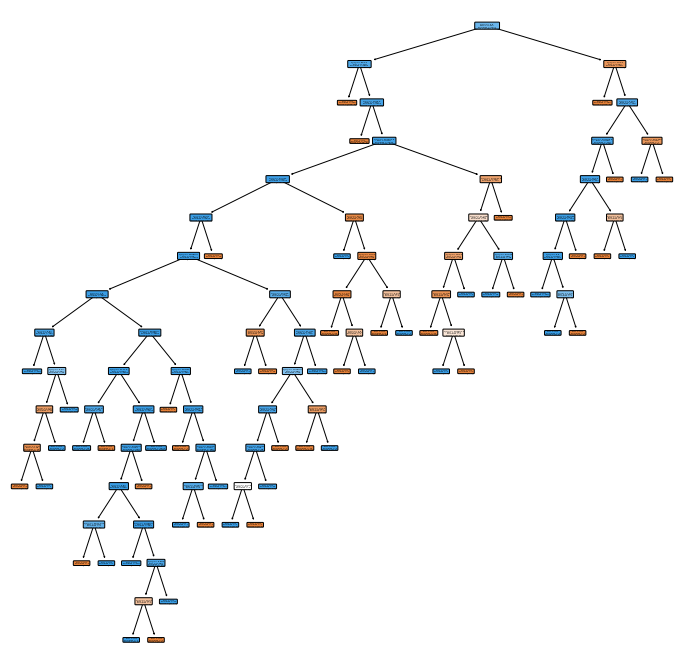

In [30]:
from sklearn import tree
plt.figure(figsize=(12,12)) 
tree.plot_tree(dtree, filled=True,  rounded=True)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       640
           1       0.99      0.99      0.99      2521

    accuracy                           0.99      3161
   macro avg       0.99      0.99      0.99      3161
weighted avg       0.99      0.99      0.99      3161



In [21]:
m2=confusion_matrix(y_test,predictions)
print(m2)

[[ 589   17]
 [  13 2542]]


# random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=40)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=40)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
rfc.score(X_train,y_train)

0.9908056724326009

In [25]:
rfc.score(X_test,y_test)

0.9835495096488454

In [26]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       606
           1       0.98      1.00      0.99      2555

    accuracy                           0.98      3161
   macro avg       0.98      0.96      0.97      3161
weighted avg       0.98      0.98      0.98      3161



In [27]:
m3=confusion_matrix(y_test,rfc_pred)
print(m3)

[[ 562   44]
 [   8 2547]]


# XGBoost

In [104]:
pip install xgboost

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [29]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[20:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [30]:
y_prediction = model.predict(X_test)

In [31]:
model.score(X_train,y_train)

1.0

In [32]:
model.score(X_test,y_test)

0.9917747548244227

In [33]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       606
           1       0.99      1.00      0.99      2555

    accuracy                           0.99      3161
   macro avg       0.99      0.98      0.99      3161
weighted avg       0.99      0.99      0.99      3161



In [34]:
m4=confusion_matrix(y_test,y_prediction)
print(m4)

[[ 588   18]
 [   8 2547]]


Використайте ансамбель voting для всіх моделей

In [35]:
from sklearn.ensemble import VotingClassifier

VR=VotingClassifier(estimators=[('1',logmodel),('2', dtree),('3', rfc),('4', model)])
VR.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[20:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('1', LogisticRegression(max_iter=200)),
                             ('2', DecisionTreeClassifier(max_depth=17)),
                             ('3',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=10,
                                                     random_state=40)),
                             ('4',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,


In [36]:
VR.score(X_train,y_train)

1.0

In [37]:
VR.score(X_test,y_test)

1.0

In [38]:
y_prediction = VR.predict(X_test)
m5=confusion_matrix(y_test,y_prediction)
print(m5)

[[ 606    0]
 [   0 2555]]


Порівняйте результати моделей та зробіть висновки

In [39]:
print('Logistic regression:')
print(m1)
print('Decision tree:')
print(m2)
print('Random forest:')
print(m3)
print('XGBoost:')
print(m4)
print('Voting Regressor:')
print(m5)

Logistic regression:
[[ 347  259]
 [  72 2483]]
Decision tree:
[[ 589   17]
 [  13 2542]]
Random forest:
[[ 562   44]
 [   8 2547]]
XGBoost:
[[ 588   18]
 [   8 2547]]
Voting Regressor:
[[ 606    0]
 [   0 2555]]


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [36]:
df = pd.read_csv('air_quality_no2_long.csv')
df

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


Виведіть список унікальних міст з датасету

In [4]:
len(df['city'].unique())

3

Виведіть дату початку та кінця ведення даних

In [5]:
start=min(df['date.utc'])
finish=max(df['date.utc'])
print('start: ', start, ', finish:',finish)


start:  2019-05-07 01:00:00+00:00 , finish: 2019-06-21 00:00:00+00:00


In [44]:
import datetime as dt

df['day'] = (pd.to_datetime(df['date.utc'])).dt.dayofweek
df1=df[df['city']=="Paris"].groupby('day')['value'].mean()
df2=df[df['city']=="London"].groupby('day')['value'].mean()
df3=df[df['city']=="Antwerpen"].groupby('day')['value'].mean()

data={"Paris": df1, "London":df2, "Antwerpen":df3}
frame = pd.DataFrame(data)
frame

,Paris,London,Antwerpen
day,,,
0,24.856250,23.969697,27.875000
1,30.999359,24.885714,22.214286
2,29.165753,23.460432,21.125000
3,28.600690,24.780142,27.500000
4,31.617986,26.446809,28.400000
5,25.266154,24.977612,33.500000
6,23.274306,24.859155,21.896552


Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

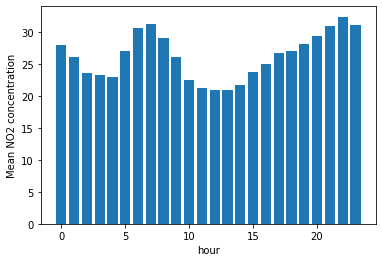

In [33]:
import datetime as dt
df['hour'] = (pd.to_datetime(df['date.utc'])).dt.hour
df1=df.groupby('hour')['value'].mean()
df=df.drop('hour', 1)

fig, ax = plt.subplots()
ax.bar(df1.index,df1)
ax.set_xlabel('hour')
ax.set_ylabel('Mean NO2 concentration')
plt.show()